In [381]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib
import matplotlib as mpl
import numpy as np
import seaborn as sns
import json

for font in font_manager.findSystemFonts('/Users/lxkr/Library/Fonts/'):
    font_manager.fontManager.addfont(font)

for font in font_manager.findSystemFonts('/System/Library/Fonts/'):
    try:
        font_manager.fontManager.addfont(font)
    except:
        None

matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# matplotlib.rc('font', family='Droid Serif')
matplotlib.rc('font', family='Helvetica')

In [382]:
architecture = 'intel'
basePath = './' + architecture + '/'

In [383]:
datasets = [
    'wiki', 
    'openai', 
    'mxbai', 
    'gist', 
    'arxiv', 
    # 'clip', 
    # 'yahoo', 
    # 'yandex', 
    # 'glove200', 
    # 'llama'
]

datasets_for_varying_k = [
    'wiki', 
    'openai', 
    'mxbai', 
    'gist', 
    'arxiv', 
    'clip', 
    'yahoo', 
    'yandex', 
    'glove200', 
    'llama'
]

datasets_for_opening = [
    'wiki', 
    'openai', 
    'mxbai', 
    'gist', 
    'arxiv', 
    'clip', 
    'yahoo', 
    'yandex', 
    'glove200', 
    'llama'
]

dataset_mapping = {
    'wiki': "Wiki", 
    'openai': "OpenAI", 
    'mxbai': "MXBAI", 
    'gist': "GIST", 
    'arxiv': "arXiv", 
    'clip': "ImageNet", 
    'yahoo': "Yahoo", 
    'yandex': "Yandex", 
    'glove200': "GloVe", 
    'llama': "Llama"
}

colors = {
    'Wiki': 'orchid',
    'OpenAI': '#e16969',
    'MXBAI': '#f6b26b',
    'GIST': '#4b8bf5', 
    'arXiv': '#59b872',
    'ImageNet': '#59b872',
    'Yahoo': '#eb9fa0',
    'Yandex': '#a9b7c6',
    'GloVe': '#2B3D41',
    'Llama': '#2B3D41',
}

algorithms_mapping = {
    'scikit': 'Scikit-Learn',
    'faiss': 'FAISS',
    'superkmeans': 'SuperKMeans'
}

colors_algorithms = {
    'Scikit-Learn': '#f6b26b',
    'FAISS': '#4b8bf5', 
    'SuperKMeans': '#59b872'
}


# 'o', 's', '^', 'v', '<', '>', 'D', 'P', 'X'
markers = {
    'Wiki': 'o',
    'OpenAI': 'X',
    'MXBAI': '^',
    'GIST': 'v',
    'ImageNet': 'P',
    'arXiv': '<',
    'Yahoo': '>',
    'Yandex': 'D',
    'GloVe': 'P',
    'Llama': 'P'
}

hatches = ["//", "\\\\", "----"]

In [559]:
df_varying_k = pd.read_csv(basePath + 'varying_k.csv')
df_end_to_end = pd.read_csv(basePath + 'end_to_end.csv')
df_sampling = pd.read_csv(basePath + 'sampling.csv')
df_etr = pd.read_csv(basePath + 'early_termination.csv')
df_iters = pd.read_csv(basePath + 'pareto.csv')

df_sampling = df_sampling[df_sampling['dataset'].isin(datasets)]
df_sampling['dataset'] = df_sampling['dataset'].apply(dataset_mapping.get)
df_sampling["sampling_fraction"] = df_sampling["config"].apply(lambda x: json.loads(x)["sampling_fraction"]) * 100
df_sampling["vectors_explored@100@1.00"] = df_sampling['vectors_explored@100@1.00'] / df_sampling['data_size'] * 100

df_varying_k = df_varying_k[df_varying_k['dataset'].isin(datasets_for_varying_k)]
df_varying_k['dataset'] = df_varying_k['dataset'].apply(dataset_mapping.get)
df_varying_k['algorithm'] = df_varying_k['algorithm'].apply(algorithms_mapping.get)
df_varying_k['construction_time'] = df_varying_k['construction_time_ms'] / 1000

df_end_to_end = df_end_to_end[df_end_to_end['dataset'].isin(datasets_for_opening)]
df_end_to_end['dataset'] = df_end_to_end['dataset'].apply(dataset_mapping.get)
df_end_to_end['dataset_verbose'] = df_end_to_end['dataset'] + "\nk = " + df_end_to_end['n_clusters'].astype(str)
df_end_to_end['algorithm'] = df_end_to_end['algorithm'].apply(algorithms_mapping.get)
df_end_to_end['construction_time'] = df_end_to_end['construction_time_ms'] / 1000

df_etr = df_etr[df_etr['dataset'].isin(datasets_for_opening)]
df_etr['dataset'] = df_etr['dataset'].apply(dataset_mapping.get)
df_etr['dataset_verbose'] = df_etr['dataset'] + "\nk = " + df_etr['n_clusters'].astype(str)
df_etr['algorithm'] = df_etr['algorithm'].apply(algorithms_mapping.get)
df_etr['construction_time'] = df_etr['construction_time_ms'] / 1000
df_etr["etr_tol"] = df_etr["config"].apply(lambda x: json.loads(x).get("recall_tol", 0))
df_etr["sample_queries"] = df_etr["config"].apply(lambda x: json.loads(x).get("sample_queries", False))

df_iters = df_iters[df_iters['dataset'].isin(datasets_for_opening)]
df_iters['dataset'] = df_iters['dataset'].apply(dataset_mapping.get)
df_iters['dataset_verbose'] = df_iters['dataset'] + "\nk = " + df_iters['n_clusters'].astype(str)
df_iters['algorithm'] = df_iters['algorithm'].apply(algorithms_mapping.get)
df_iters['construction_time'] = df_iters['construction_time_ms'] / 1000
df_iters["sampling_fraction"] = df_iters["config"].apply(lambda x: json.loads(x)["sampling_fraction"]) * 100
df_iters = df_iters[df_iters['sampling_fraction'] >= 90]

In [488]:
df_iters

,timestamp,algorithm,dataset,n_iters,actual_iterations,dimensionality,data_size,n_clusters,construction_time_ms,threads,...,centroids_explored@100@5.00,vectors_explored@100@5.00,recall@100@10.00,recall_std@100@10.00,centroids_explored@100@10.00,vectors_explored@100@10.00,config,dataset_verbose,construction_time,sampling_fraction
450,2025-12-18 18:33:00,SuperKMeans,Llama,1,1,128,256921,2027,203.82,32,...,101,12396.24,0.863519,0.108136,202,24748.22,"{""verbose"":false,""recall_tol"":0.001000,""sampli...",Llama\nk = 2027,0.20382,90.0
451,2025-12-18 18:33:02,SuperKMeans,Llama,2,2,128,256921,2027,264.29,32,...,101,12438.41,0.875200,0.100036,202,24668.82,"{""verbose"":false,""recall_tol"":0.001000,""sampli...",Llama\nk = 2027,0.26429,90.0
452,2025-12-18 18:33:03,SuperKMeans,Llama,3,3,128,256921,2027,319.82,32,...,101,12343.05,0.883269,0.096250,202,24479.68,"{""verbose"":false,""recall_tol"":0.001000,""sampli...",Llama\nk = 2027,0.31982,90.0
453,2025-12-18 18:33:05,SuperKMeans,Llama,4,4,128,256921,2027,377.26,32,...,101,12273.84,0.890480,0.090064,202,24388.02,"{""verbose"":false,""recall_tol"":0.001000,""sampli...",Llama\nk = 2027,0.37726,90.0
454,2025-12-18 18:33:07,SuperKMeans,Llama,5,5,128,256921,2027,430.22,32,...,101,12226.74,0.889889,0.090392,202,24308.38,"{""verbose"":false,""recall_tol"":0.001000,""sampli...",Llama\nk = 2027,0.43022,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,2025-12-19 04:47:31,SuperKMeans,arXiv,21,21,768,2253000,6003,51316.74,32,...,300,119613.70,0.998009,0.006602,600,236001.83,"{""verbose"":false,""recall_tol"":0.001000,""sampli...",arXiv\nk = 6003,51.31674,90.0
2946,2025-12-19 04:48:44,SuperKMeans,arXiv,22,22,768,2253000,6003,53024.02,32,...,300,119672.73,0.997989,0.006671,600,236082.17,"{""verbose"":false,""recall_tol"":0.001000,""sampli...",arXiv\nk = 6003,53.02402,90.0
2947,2025-12-19 04:50:00,SuperKMeans,arXiv,23,23,768,2253000,6003,55439.51,32,...,300,119739.40,0.998009,0.006602,600,236182.56,"{""verbose"":false,""recall_tol"":0.001000,""sampli...",arXiv\nk = 6003,55.43951,90.0
2948,2025-12-19 04:51:18,SuperKMeans,arXiv,24,24,768,2253000,6003,57101.85,32,...,300,119794.78,0.998009,0.006617,600,236276.58,"{""verbose"":false,""recall_tol"":0.001000,""sampli...",arXiv\nk = 6003,57.10185,90.0


# Sampling

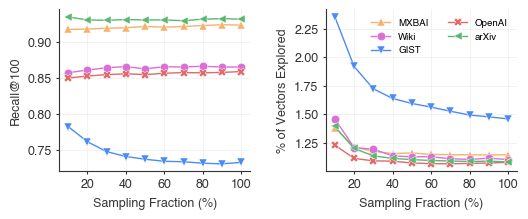

In [385]:
fig, (ax1, ax2) = plt.subplots(
    1, 2, 
    # constrained_layout=True, 
    # gridspec_kw={ 'width_ratios': [2, 1] }
)
tick_fonts_color = '#333333'
bar_text_color = '#191919'
font_color = "#383838"
fig.set_size_inches(5.9, 2.1)
plt.subplots_adjust(
    wspace=0.4
)
sns.lineplot(
    data=df_sampling, 
    x="sampling_fraction", 
    y="recall@100@1.00", 
    hue='dataset',
    ax=ax1,
    markeredgewidth=0.3,
    linewidth=1.0,
    style="dataset",
    markers=markers,
    palette=colors,
    dashes=False
)
sns.lineplot(
    data=df_sampling, 
    x="sampling_fraction", 
    y="vectors_explored@100@1.00", 
    hue='dataset',
    ax=ax2,
    markeredgewidth=0.3,
    linewidth=1.0,
    style="dataset",
    markers=markers,
    palette=colors,
    dashes=False
)
ax1.xaxis.grid(linewidth=0.5, color='#ededed')
ax1.yaxis.grid(linewidth=0.5, color='#ededed')
ax1.set_axisbelow(True)
ax2.xaxis.grid(linewidth=0.5, color='#ededed')
ax2.yaxis.grid(linewidth=0.5, color='#ededed')
ax2.set_axisbelow(True)

ax2.legend(
#     [handles[idx] for idx in order],[labels[idx] for idx in order],
    loc="upper right",
    prop={'size': 7.0},
    frameon=False,
    ncols=2
)
ax1.legend().set_visible(False)

ax1.set_xlabel('Sampling Fraction (%)', fontdict={"size": 9}, color=font_color)
ax1.set_ylabel('Recall@100', fontdict={"size": 9}, color=font_color)
ax1.tick_params(axis='both', labelsize=9)

ax2.set_xlabel('Sampling Fraction (%)', fontdict={"size": 9}, color=font_color)
ax2.set_ylabel('% of Vectors Explored', fontdict={"size": 9}, color=font_color)
ax2.tick_params(axis='both', labelsize=9)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(True)
ax1.spines['left'].set_color(tick_fonts_color)
ax1.spines['bottom'].set_color(tick_fonts_color)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(True)
ax2.spines['left'].set_color(tick_fonts_color)
ax2.spines['bottom'].set_color(tick_fonts_color)

ax1.tick_params(axis='both', colors=tick_fonts_color)
ax1.tick_params(axis='both', length=2, color=tick_fonts_color)
ax2.tick_params(axis='both', colors=tick_fonts_color)
ax2.tick_params(axis='both', length=2, color=tick_fonts_color)

plt.savefig(f'../plotter/paper_plots/sampling.png', format='png', dpi=600, bbox_inches='tight')

# Increasing $k$ (opening)

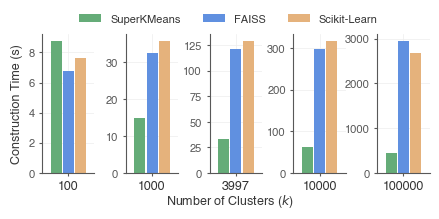

In [386]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(
    1, 5, 
    # constrained_layout=True, 
    # gridspec_kw={ 'width_ratios': [2, 1] }
)
tick_fonts_color = '#333333'
bar_text_color = '#191919'
font_color = "#383838"
fig.set_size_inches(5.0, 1.8)
plt.subplots_adjust(
    wspace=0.6
)

axes = [ax1, ax2, ax3, ax4, ax5]

df_to_plot = df_varying_k[df_varying_k['dataset'] == 'OpenAI']
df_to_plot = df_to_plot[df_to_plot['n_clusters'] > 10]


for i, cur_k in enumerate(df_to_plot['n_clusters'].unique()):
    cur_ax = axes[i]
    sns.barplot(
        data=df_to_plot[df_to_plot['n_clusters'] == cur_k], 
        x="n_clusters", 
        y="construction_time", 
        hue='algorithm',
        ax=cur_ax,
        errorbar=None,
        dodge=True,
        gap=0.1,
        width=0.7,
        palette=colors_algorithms
    )
    cur_ax.xaxis.grid(linewidth=0.5, color='#ededed')
    cur_ax.yaxis.grid(linewidth=0.5, color='#ededed')
    cur_ax.set_axisbelow(True)
    if i == 0:
        cur_ax.legend(
            bbox_to_anchor=(6.6, 1.22),
            # [handles[idx] for idx in order],[labels[idx] for idx in order],
            loc="upper right",
            prop={'size': 8.0},
            labelcolor=font_color,
            frameon=False,
            ncols=3
        )
        cur_ax.set_ylabel('Construction Time (s)', fontdict={"size": 9}, color=font_color)
    else:
        cur_ax.legend().set_visible(False)
        cur_ax.set_ylabel('')
    cur_ax.tick_params(axis='x', labelsize=9)
    cur_ax.tick_params(axis='y', labelsize=8, colors="#585858")
    # cur_ax.set_xlabel(f'{cur_k}', fontdict={"size": 9}, color=font_color)
    cur_ax.set_xlabel('')

    cur_ax.spines['top'].set_visible(False)
    cur_ax.spines['right'].set_visible(False)
    cur_ax.spines['left'].set_visible(True)
    cur_ax.spines['left'].set_color("#585858")
    cur_ax.spines['bottom'].set_color("#585858")
    cur_ax.tick_params(axis='x', colors=tick_fonts_color)
    cur_ax.tick_params(axis='both', length=2, color="#585858")

fig.supxlabel('Number of Clusters ($k$)', x=0.5, y=-0.09, fontsize=9, color=font_color)

plt.savefig(f'../plotter/paper_plots/opening.png', format='png', dpi=600, bbox_inches='tight')

# Clustering Time

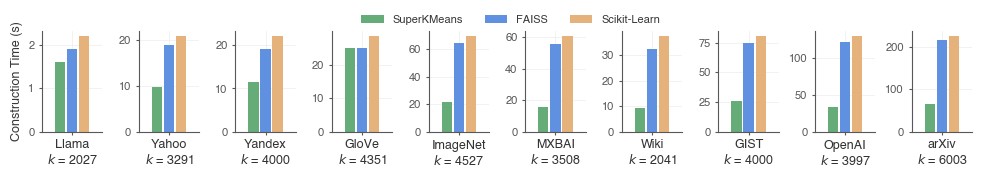

In [387]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(
    1, 10, 
    # constrained_layout=True, 
    # gridspec_kw={ 'width_ratios': [2, 1] }
)
tick_fonts_color = '#333333'
bar_text_color = '#191919'
font_color = "#383838"
fig.set_size_inches(12, 1.3)
plt.subplots_adjust(
    wspace=0.6
)

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

df_to_plot = df_end_to_end

for i, cur_dataset in enumerate(df_to_plot['dataset'].unique()):
    cur_ax = axes[i]
    dim = df_to_plot[df_to_plot['dataset'] == cur_dataset]['dimensionality'].values[0]
    n_clusters = df_to_plot[df_to_plot['dataset'] == cur_dataset]['n_clusters'].values[0]
    sns.barplot(
        data=df_to_plot[df_to_plot['dataset'] == cur_dataset], 
        x="dataset", 
        y="construction_time", 
        hue='algorithm',
        ax=cur_ax,
        errorbar=None,
        dodge=True,
        gap=0.15,
        width=0.6,
        palette=colors_algorithms
    )
    cur_ax.xaxis.grid(linewidth=0.5, color='#ededed')
    cur_ax.yaxis.grid(linewidth=0.5, color='#ededed')
    cur_ax.set_axisbelow(True)
    if i == 0:
        cur_ax.legend(
            bbox_to_anchor=(10.4, 1.27),
            # [handles[idx] for idx in order],[labels[idx] for idx in order],
            loc="upper right",
            prop={'size': 8.0},
            labelcolor=font_color,
            frameon=False,
            ncols=3
        )
        cur_ax.set_ylabel('Construction Time (s)', fontdict={"size": 9}, color=font_color)
    else:
        cur_ax.legend().set_visible(False)
        cur_ax.set_ylabel('')
    cur_ax.tick_params(axis='x', labelsize=9)
    cur_ax.tick_params(axis='y', labelsize=8, colors="#585858")
    # cur_ax.set_xlabel(f'{cur_k}', fontdict={"size": 9}, color=font_color)
    cur_ax.set_xlabel(f'')
    cur_ax.set_xticks([0], labels=[f'{cur_dataset}\n$k$ = {n_clusters}'])
    

    cur_ax.spines['top'].set_visible(False)
    cur_ax.spines['right'].set_visible(False)
    cur_ax.spines['left'].set_visible(True)
    cur_ax.spines['left'].set_color("#585858")
    cur_ax.spines['bottom'].set_color("#585858")
    cur_ax.tick_params(axis='x', colors=tick_fonts_color)
    cur_ax.tick_params(axis='both', length=2, color="#585858")

# fig.supxlabel('Number of Clusters ($k$)', x=0.5, y=-0.09, fontsize=9, color=font_color)

plt.savefig(f'../plotter/paper_plots/clustering_time.png', format='png', dpi=600, bbox_inches='tight')

# Table 1

In [388]:
table_1 = df_end_to_end[['dataset', 'algorithm', 'n_clusters', 'construction_time', 'recall@100@1.00', 'recall@10@1.00', 'vectors_explored@100@1.00']]
table_1 = table_1[table_1['algorithm'].isin(['SuperKMeans', 'FAISS'])]
table_1

,dataset,algorithm,n_clusters,construction_time,recall@100@1.00,recall@10@1.00,vectors_explored@100@1.00
6,Llama,SuperKMeans,2027,1.59229,0.463220,0.547399,2362.25
7,Llama,FAISS,2027,1.89996,0.466330,0.544100,2379.00
12,Yahoo,SuperKMeans,3291,9.68574,0.886048,0.930901,6861.45
13,Yahoo,FAISS,3291,19.05663,0.885400,0.929701,6795.98
15,Yandex,SuperKMeans,4000,11.61358,0.879489,0.922101,9757.99
16,Yandex,FAISS,4000,19.22012,0.878999,0.918301,9500.38
18,GloVe,SuperKMeans,4351,25.00971,0.721520,0.813201,13030.55
19,GloVe,FAISS,4351,24.87405,0.721289,0.815801,13108.41
21,ImageNet,SuperKMeans,4527,21.52312,0.975879,0.992100,12981.73
22,ImageNet,FAISS,4527,64.29160,0.975269,0.989700,13046.83


# Increasing K

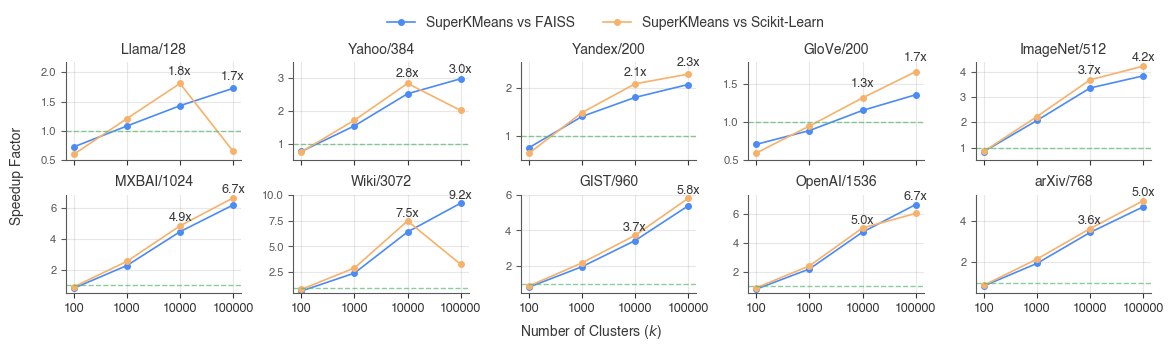

In [477]:

fig, (
    (ax1, ax2, ax3, ax4, ax5),
    (ax6, ax7, ax8, ax9, ax10)
) = plt.subplots(
    2, 5, 
    # constrained_layout=True, 
    # gridspec_kw={ 'width_ratios': [2, 1] }
)

tick_fonts_color = '#333333'
bar_text_color = '#191919'
font_color = "#383838"
fig.set_size_inches(14, 3.0)
plt.subplots_adjust(
    wspace=0.3,
    hspace=0.35,
)

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

df_to_plot = df_varying_k[
    (df_varying_k['n_clusters'] % 10 == 0) &
    (df_varying_k['n_clusters'] > 10)
]

for i, cur_dataset in enumerate(df_to_plot['dataset'].unique()):
    cur_ax = axes[i]
    dim = df_to_plot[df_to_plot['dataset'] == cur_dataset]['dimensionality'].values[0]
    n_clusters = df_to_plot[df_to_plot['dataset'] == cur_dataset]['n_clusters'].values[0]
    df_dataset = df_to_plot[df_to_plot['dataset'] == cur_dataset]
    
    algo_data = {}
    for algo in ['SuperKMeans', 'FAISS', 'Scikit-Learn']:
        df_algo = df_dataset[df_dataset['algorithm'] == algo]
        if len(df_algo) > 0:
            algo_data[algo] = df_algo.sort_values('n_clusters')
    
    k_values = sorted(df_dataset['n_clusters'].unique())
    
    # === Subplot 1: Construction time bars ===
    x = np.arange(len(k_values))
    width = 0.25
    skm_times = algo_data['SuperKMeans'].set_index('n_clusters')['construction_time_ms']
    
    # === Subplot 2: Speedup relative to SuperKMeans ===
    for algo, label in [('FAISS', 'SuperKMeans vs FAISS'),
                        ('Scikit-Learn', 'SuperKMeans vs Scikit-Learn')]:
        if algo in algo_data:
            speedups = []
            for k in k_values:
                skm_time = skm_times.get(k, None)
                df_k = algo_data[algo][algo_data[algo]['n_clusters'] == k]
    
                if skm_time and len(df_k) > 0:
                    time = df_k['construction_time_ms'].values[0]
                    speedup = time / skm_time
                    speedups.append(speedup)
                else:
                    speedups.append(None)
    
            # Plot line with markers
            valid_indices = [i for i, s in enumerate(speedups) if s is not None]
            valid_k = [k_values[i] for i in valid_indices]
            valid_speedups = [speedups[i] for i in valid_indices]
    
            cur_ax.plot(valid_k, valid_speedups, 'o-',
                    label=label, color=colors_algorithms.get(algo, font_color),
                    linewidth=1.2, markersize=4, alpha=1.0)
    
            # Add speedup value labels
            offset = 0.1 
            y_min, y_max = cur_ax.get_ylim()
            cur_ax.set_ylim(y_min, y_max + 0.2)
            # offset = offset / y_min
            for k, speedup in zip(valid_k, valid_speedups):
                if k == 100000 and cur_dataset in ['Yahoo', 'OpenAI', 'Wiki', 'Llama'] and algo == 'FAISS': 
                  cur_ax.text(
                        k, 
                        speedup + offset, 
                        f'{speedup:.1f}x',
                        ha='center', 
                        va='bottom', fontsize=9, color=font_color, fontweight='bold')
                elif k == 100000 and cur_dataset in ['Yahoo', 'OpenAI', 'Wiki', 'Llama'] and algo == 'Scikit-Learn':
                    None
                elif k > 1000 and algo == 'Scikit-Learn':
                    cur_ax.text(
                        k, 
                        speedup + offset, 
                        f'{speedup:.1f}x',
                        ha='center', 
                        va='bottom', fontsize=9, color=font_color, fontweight='bold')
    
    cur_ax.set_title(f'{cur_dataset}/{dim}', fontsize=10, color=font_color)
    
    # Add baseline line at 1.0x
    cur_ax.axhline(y=1.0, color=colors_algorithms.get('SuperKMeans'), linestyle='--',
                linewidth=1.0, alpha=0.7)
    
    cur_ax.set_xscale('log')
    cur_ax.set_xticks(k_values)
    # cur_ax.set_xticklabels([f'{k:,}' for k in k_values])
    cur_ax.set_xticklabels([f'' for k in k_values])
    if i > 4:
        cur_ax.set_xticklabels([f'{k:}' for k in k_values])
    if i == 0:
        cur_ax.legend(
            bbox_to_anchor=(4.4, 1.6),
            # [handles[idx] for idx in order],[labels[idx] for idx in order],
            loc="upper right",
            prop={'size': 10.0},
            labelcolor=font_color,
            frameon=False,
            ncols=3
        )
        cur_ax.set_ylabel('Speedup Factor\n')
    else:
        cur_ax.legend().set_visible(False)
        cur_ax.set_ylabel('')

    cur_ax.tick_params(axis='x', labelsize=9)
    cur_ax.tick_params(axis='y', labelsize=8, colors="#585858")
    cur_ax.set_xlabel('')
    cur_ax.set_ylabel('')
    cur_ax.grid(True, alpha=0.3, which='both')
    cur_ax.set_axisbelow(True)
    cur_ax.set_ylim(bottom=0.5)
    cur_ax.spines['top'].set_visible(False)
    cur_ax.spines['right'].set_visible(False)
    cur_ax.spines['left'].set_visible(True)
    cur_ax.spines['left'].set_color("#585858")
    cur_ax.spines['bottom'].set_color("#585858")
    cur_ax.tick_params(axis='x', colors=tick_fonts_color)
    cur_ax.grid(which='minor', visible=False)
    cur_ax.tick_params(which='minor', length=0)
    # cur_ax.tick_params(axis='both', length=2, color="#585858")
    
#plt.tight_layout()
fig.supxlabel('Number of Clusters ($k$)', x=0.5, y=-0.05, fontsize=10, color=font_color)
fig.supylabel('Speedup Factor', x=0.085, y=0.5, fontsize=10, color=font_color)
# Save plot
plt.savefig(f'../plotter/paper_plots/varying_k.png', format='png', dpi=600, bbox_inches='tight')
# plt.close()

# Early Termination

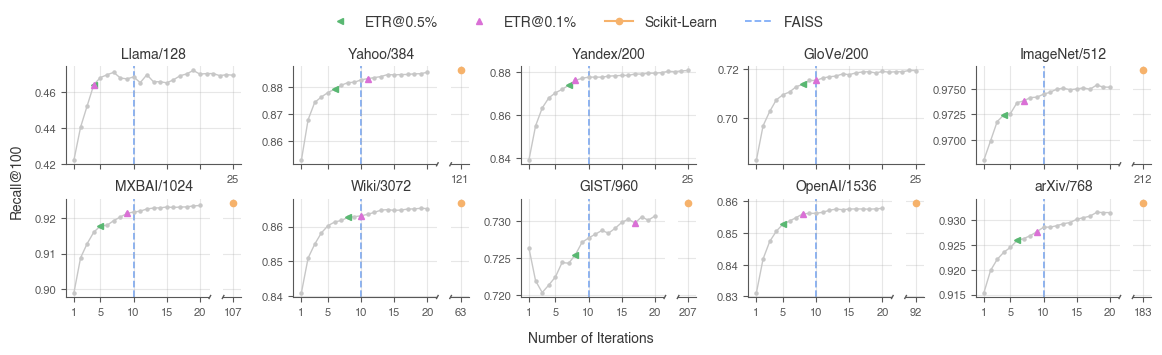

In [619]:
fig, (
    (ax1, ax2, ax3, ax4, ax5),
    (ax6, ax7, ax8, ax9, ax10)
) = plt.subplots(
    2, 5, 
    # constrained_layout=True, 
    # gridspec_kw={ 'width_ratios': [2, 1] }
)

import matplotlib.patches as patches

tick_fonts_color = '#333333'
bar_text_color = '#191919'
font_color = "#383838"
fig.set_size_inches(14, 3.0)
plt.subplots_adjust(
    wspace=0.3,
    hspace=0.35,
)

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

df_to_plot = df_iters

SAMPLE_QUERIES = False
METRIC_TO_USE = 'recall@100@1.00'

for i, cur_dataset in enumerate(df_to_plot['dataset'].unique()):
    cur_ax = axes[i]
    dim = df_to_plot[df_to_plot['dataset'] == cur_dataset]['dimensionality'].values[0]
    n_clusters = df_to_plot[df_to_plot['dataset'] == cur_dataset]['n_clusters'].values[0]
    df_dataset = df_to_plot[df_to_plot['dataset'] == cur_dataset]
    
    iter_values = sorted(df_dataset['n_iters'].unique())

    # print(df_etr[(df_etr['dataset'] == cur_dataset)]['etr_tol'])

    etr_at_0_0_1 = df_etr[(df_etr['sample_queries'] == SAMPLE_QUERIES) & (df_etr['dataset'] == cur_dataset) & (df_etr['etr_tol'] == 0.0001)]['actual_iterations'].values[0]
    etr_at_0_1 = df_etr[(df_etr['sample_queries'] == SAMPLE_QUERIES) & (df_etr['dataset'] == cur_dataset) & (df_etr['etr_tol'] ==   0.001)]['actual_iterations'].values[0]
    etr_at_0_5 = df_etr[(df_etr['sample_queries'] == SAMPLE_QUERIES) & (df_etr['dataset'] == cur_dataset) & (df_etr['etr_tol'] ==   0.005)]['actual_iterations'].values[0]
    etr_at_1_0 = df_etr[(df_etr['sample_queries'] == SAMPLE_QUERIES) & (df_etr['dataset'] == cur_dataset) & (df_etr['etr_tol'] ==   0.01)]['actual_iterations'].values[0]

    scikit_learn_x = df_etr[(df_etr['algorithm'] == 'Scikit-Learn') & (df_etr['dataset'] == cur_dataset)]['actual_iterations'].values[0]
    scikit_learn_y = df_etr[(df_etr['algorithm'] == 'Scikit-Learn') & (df_etr['dataset'] == cur_dataset)][METRIC_TO_USE].values[0]
    
    
    # === Subplot 1: Construction time bars ===
    x = np.arange(len(iter_values))
    width = 0.25
    skm_times = algo_data['SuperKMeans'].set_index('n_clusters')['construction_time_ms']
    
    # === Subplot 2: Speedup relative to SuperKMeans ===
    # Plot line with markers
    valid_iters = df_dataset['n_iters']
    valid_recalls = df_dataset[METRIC_TO_USE]
    # valid_recalls = df_dataset['vectors_explored@100@1.00']

    if cur_dataset not in ['Llama', 'Yandex', 'GloVe']:
        cur_ax.plot(valid_iters[:20], valid_recalls[:20], 'o-', color='#c7c7c7',
            linewidth=1.0, markersize=2.2, alpha=1.0)
    else:
        cur_ax.plot(valid_iters, valid_recalls, 'o-', color='#c7c7c7',
            linewidth=1.0, markersize=2.2, alpha=1.0)
    
    labels = [
        #'ETR@0.01%', 
        'ETR@0.5%', 'ETR@0.1%', 
        #'ETR@1.0%'
    ]
    etr_colors = [
        #'red', 
        '#59b872', 'orchid',
        # 'green'
    ]
    sizes= [4.5, 4.5, 3.0, 2.5]
    markers = ['<', '^', 'x', 'x']
    for k, etr_value in enumerate([
        # etr_at_0_0_1,
        etr_at_0_5,
        etr_at_0_1,
        # etr_at_1_0
    ]):
        y_val = valid_recalls.values[etr_value - 1]
        cur_ax.plot(etr_value, y_val, markers[k],
            label=labels[k], color=etr_colors[k], markersize=sizes[k], alpha=1.0)


    if cur_dataset not in ['Llama', 'Yandex', 'GloVe']:
        cur_ax.plot(25, scikit_learn_y, marker='o',
            label='Scikit-Learn', color='#f6b26b', markersize=4.5, alpha=1.0)

    # Add speedup value labels
    # offset = 0.1 
    # y_min, y_max = cur_ax.get_ylim()
    # cur_ax.set_ylim(y_min, y_max + 0.2)
    # # offset = offset / y_min
    # for k, speedup in zip(valid_k, valid_speedups):
    #     if k == 100000 and cur_dataset in ['Yahoo', 'OpenAI', 'Wiki', 'Llama'] and algo == 'FAISS': 
    #       cur_ax.text(
    #             k, 
    #             speedup + offset, 
    #             f'{speedup:.1f}x',
    #             ha='center', 
    #             va='bottom', fontsize=9, color=font_color, fontweight='bold')
    #     elif k == 100000 and cur_dataset in ['Yahoo', 'OpenAI', 'Wiki', 'Llama'] and algo == 'Scikit-Learn':
    #         None
    #     elif k > 1000 and algo == 'Scikit-Learn':
    #         cur_ax.text(
    #             k, 
    #             speedup + offset, 
    #             f'{speedup:.1f}x',
    #             ha='center', 
    #             va='bottom', fontsize=9, color=font_color, fontweight='bold')
    
    cur_ax.set_title(f'{cur_dataset}/{dim}', fontsize=10, color=font_color)
    
    # Add baseline line at 1.0x
    # cur_ax.axhline(y=1.0, color=colors_algorithms.get('SuperKMeans'), linestyle='--',
    #             linewidth=1.0, alpha=0.7)
    cur_ax.axvline(x=10, color=colors_algorithms.get('FAISS'), linestyle='--',
                linewidth=1.3, alpha=0.7, label='FAISS', zorder=-1)
    
    # cur_ax.set_xscale('log')
    cur_ax.set_xticks([1, 5, 10, 15, 20, 25])
    cur_ax.set_xticklabels(['', '', '', '', '', '25'])
    if i > 4:
        cur_ax.set_xticklabels(['1', '5', '10', '15', '20', '25'])
    if i == 1:
        cur_ax.legend(
            bbox_to_anchor=(3.1, 1.65),
            # [handles[idx] for idx in order],[labels[idx] for idx in order],
            loc="upper right",
            prop={'size': 10.0},
            labelcolor=font_color,
            frameon=False,
            ncols=4
        )
    else:
        cur_ax.legend().set_visible(False)

    if cur_dataset not in ['Llama', 'Yandex', 'GloVe']:
        gap_start, gap_end = 21.5, 23.5
        if i > 4:
            cur_ax.set_xticklabels(['1', '5', '10', '15', '20', scikit_learn_x])
        else:
            cur_ax.set_xticklabels(['', '', '', '', '', scikit_learn_x])
        rect = patches.Rectangle(
            (gap_start, -0.15),          # y < 0 to cover ticks/labels
            gap_end - gap_start,
            1.3,                         # extend above and below axis
            transform=cur_ax.get_xaxis_transform(),
            facecolor="white",
            edgecolor="none",
            clip_on=False,
            zorder=10
        )
        cur_ax.add_patch(rect)
        d = 0.015   # size of diagonal lines (axes units)
        lw = 1.0
        for x0 in (gap_start, gap_end):
            cur_ax.plot(
                [x0 - 0.12, x0 + 0.12],   # x in data units
                [-d, +d],                # y in axes units
                transform=cur_ax.get_xaxis_transform(),
                color="#585858",
                linewidth=lw,
                clip_on=False,
                zorder=11
            )

    cur_ax.tick_params(axis='x', labelsize=8)
    cur_ax.tick_params(axis='y', labelsize=8, colors="#585858")
    cur_ax.set_xlabel('')
    cur_ax.set_ylabel('')
    cur_ax.grid(True, alpha=0.3, which='both')
    cur_ax.set_axisbelow(True)
    # cur_ax.set_ylim(bottom=0.5)
    cur_ax.spines['top'].set_visible(False)
    cur_ax.spines['right'].set_visible(False)
    cur_ax.spines['left'].set_visible(True)
    cur_ax.spines['left'].set_color("#585858")
    cur_ax.spines['bottom'].set_color("#585858")
    cur_ax.grid(which='minor', visible=False)
    
    cur_ax.tick_params(axis='x', colors='#585858')
    cur_ax.tick_params(which='minor', length=0)
    
    # cur_ax.tick_params(axis='both', length=2, color="#585858")
    
#plt.tight_layout()
fig.supxlabel('Number of Iterations', x=0.5, y=-0.05, fontsize=10, color=font_color)
fig.supylabel('Recall@100', x=0.085, y=0.5, fontsize=10, color=font_color)
# Save plot
plt.savefig(f'../plotter/paper_plots/iters.png', format='png', dpi=600, bbox_inches='tight')
# plt.close()

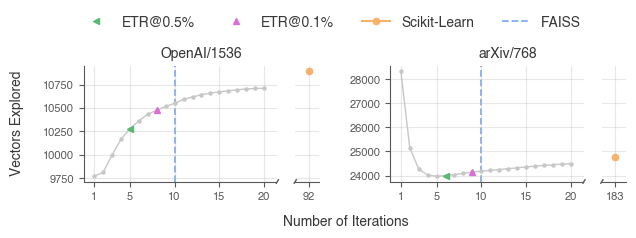

In [641]:
fig, (ax1, ax2) = plt.subplots(
    1, 2, 
)

import matplotlib.patches as patches

tick_fonts_color = '#333333'
bar_text_color = '#191919'
font_color = "#383838"
fig.set_size_inches(7, 1.5)
plt.subplots_adjust(
    wspace=0.3,
    hspace=0.35,
)

axes = [ax1, ax2]

df_to_plot = df_iters

SAMPLE_QUERIES = False
METRIC_TO_USE = 'vectors_explored@100@1.00'

for i, cur_dataset in enumerate(['OpenAI', 'arXiv']):
    cur_ax = axes[i]
    dim = df_to_plot[df_to_plot['dataset'] == cur_dataset]['dimensionality'].values[0]
    n_clusters = df_to_plot[df_to_plot['dataset'] == cur_dataset]['n_clusters'].values[0]
    df_dataset = df_to_plot[df_to_plot['dataset'] == cur_dataset]
    
    iter_values = sorted(df_dataset['n_iters'].unique())

    # print(df_etr[(df_etr['dataset'] == cur_dataset)]['etr_tol'])

    etr_at_0_0_1 = df_etr[(df_etr['sample_queries'] == SAMPLE_QUERIES) & (df_etr['dataset'] == cur_dataset) & (df_etr['etr_tol'] == 0.0001)]['actual_iterations'].values[0]
    etr_at_0_1 = df_etr[(df_etr['sample_queries'] == SAMPLE_QUERIES) & (df_etr['dataset'] == cur_dataset) & (df_etr['etr_tol'] ==   0.001)]['actual_iterations'].values[0]
    etr_at_0_5 = df_etr[(df_etr['sample_queries'] == SAMPLE_QUERIES) & (df_etr['dataset'] == cur_dataset) & (df_etr['etr_tol'] ==   0.005)]['actual_iterations'].values[0]
    etr_at_1_0 = df_etr[(df_etr['sample_queries'] == SAMPLE_QUERIES) & (df_etr['dataset'] == cur_dataset) & (df_etr['etr_tol'] ==   0.01)]['actual_iterations'].values[0]

    scikit_learn_x = df_etr[(df_etr['algorithm'] == 'Scikit-Learn') & (df_etr['dataset'] == cur_dataset)]['actual_iterations'].values[0]
    scikit_learn_y = df_etr[(df_etr['algorithm'] == 'Scikit-Learn') & (df_etr['dataset'] == cur_dataset)][METRIC_TO_USE].values[0]
    
    
    # === Subplot 1: Construction time bars ===
    x = np.arange(len(iter_values))
    width = 0.25
    skm_times = algo_data['SuperKMeans'].set_index('n_clusters')['construction_time_ms']
    
    # === Subplot 2: Speedup relative to SuperKMeans ===
    # Plot line with markers
    valid_iters = df_dataset['n_iters']
    valid_recalls = df_dataset[METRIC_TO_USE]
    # valid_recalls = df_dataset['vectors_explored@100@1.00']

    if cur_dataset not in ['Llama', 'Yandex', 'GloVe']:
        cur_ax.plot(valid_iters[:20], valid_recalls[:20], 'o-', color='#c7c7c7',
            linewidth=1.0, markersize=2.2, alpha=1.0)
    else:
        cur_ax.plot(valid_iters, valid_recalls, 'o-', color='#c7c7c7',
            linewidth=1.0, markersize=2.2, alpha=1.0)
    
    labels = [
        #'ETR@0.01%', 
        'ETR@0.5%', 'ETR@0.1%', 
        #'ETR@1.0%'
    ]
    etr_colors = [
        #'red', 
        '#59b872', 'orchid',
        # 'green'
    ]
    sizes= [4.5, 4.5, 3.0, 2.5]
    markers = ['<', '^', 'x', 'x']
    for k, etr_value in enumerate([
        # etr_at_0_0_1,
        etr_at_0_5,
        etr_at_0_1,
        # etr_at_1_0
    ]):
        y_val = valid_recalls.values[etr_value - 1]
        cur_ax.plot(etr_value, y_val, markers[k],
            label=labels[k], color=etr_colors[k], markersize=sizes[k], alpha=1.0)


    if cur_dataset not in ['Llama', 'Yandex', 'GloVe']:
        cur_ax.plot(25, scikit_learn_y, marker='o',
            label='Scikit-Learn', color='#f6b26b', markersize=4.5, alpha=1.0)

    cur_ax.set_title(f'{cur_dataset}/{dim}', fontsize=10, color=font_color)
    cur_ax.axvline(x=10, color=colors_algorithms.get('FAISS'), linestyle='--',
                linewidth=1.3, alpha=0.7, label='FAISS', zorder=-1)
    
    # cur_ax.set_xscale('log')
    cur_ax.set_xticks([1, 5, 10, 15, 20, 25])
    cur_ax.set_xticklabels(['', '', '', '', '', '25'])
    if i > 4:
        cur_ax.set_xticklabels(['1', '5', '10', '15', '20', '25'])
    if i == 1:
        cur_ax.legend(
            bbox_to_anchor=(0.86, 1.55),
            # [handles[idx] for idx in order],[labels[idx] for idx in order],
            loc="upper right",
            prop={'size': 10.0},
            labelcolor=font_color,
            frameon=False,
            ncols=4
        )
    else:
        cur_ax.legend().set_visible(False)

    if cur_dataset not in ['Llama', 'Yandex', 'GloVe']:
        gap_start, gap_end = 21.5, 23.5
        cur_ax.set_xticklabels(['1', '5', '10', '15', '20', scikit_learn_x])
        rect = patches.Rectangle(
            (gap_start, -0.15),          # y < 0 to cover ticks/labels
            gap_end - gap_start,
            1.3,                         # extend above and below axis
            transform=cur_ax.get_xaxis_transform(),
            facecolor="white",
            edgecolor="none",
            clip_on=False,
            zorder=10
        )
        cur_ax.add_patch(rect)
        d = 0.015   # size of diagonal lines (axes units)
        lw = 1.0
        for x0 in (gap_start, gap_end):
            cur_ax.plot(
                [x0 - 0.12, x0 + 0.12],   # x in data units
                [-d, +d],                # y in axes units
                transform=cur_ax.get_xaxis_transform(),
                color="#585858",
                linewidth=lw,
                clip_on=False,
                zorder=11
            )

    cur_ax.tick_params(axis='x', labelsize=8)
    cur_ax.tick_params(axis='y', labelsize=8, colors="#585858")
    cur_ax.set_xlabel('')
    cur_ax.set_ylabel('')
    cur_ax.grid(True, alpha=0.3, which='both')
    cur_ax.set_axisbelow(True)
    # cur_ax.set_ylim(bottom=0.5)
    cur_ax.spines['top'].set_visible(False)
    cur_ax.spines['right'].set_visible(False)
    cur_ax.spines['left'].set_visible(True)
    cur_ax.spines['left'].set_color("#585858")
    cur_ax.spines['bottom'].set_color("#585858")
    cur_ax.grid(which='minor', visible=False)
    
    cur_ax.tick_params(axis='x', colors='#585858')
    cur_ax.tick_params(which='minor', length=0)
    
    # cur_ax.tick_params(axis='both', length=2, color="#585858")
    
#plt.tight_layout()
fig.supxlabel('Number of Iterations', x=0.5, y=-0.2, fontsize=10, color=font_color)
fig.supylabel('Vectors Explored', x=0.02, y=0.5, fontsize=10, color=font_color)
# Save plot
plt.savefig(f'../plotter/paper_plots/iters_explored.png', format='png', dpi=600, bbox_inches='tight')
# plt.close()